# Setup

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

UNCLEADED_DATASET_PATH: str = 'updated_dataset.csv'
CLEANED_DATASET_PATH: str = 'cleaned_dataset.csv'

SONG_KEY_MAP: dict[int, str] = {
    -1: 'No-Key',
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B'
}

TIME_SIGNATURE_MAP: dict[int, str] = {
    -1: "No-Time-Signature",
    3: "3/4",
    4: "4/4",
    5: "5/4",
    6: "6/4",
    7: "7/4",
}

uncleaned_df: pd.DataFrame = pd.read_csv(UNCLEADED_DATASET_PATH)
uncleaned_df.drop(columns=["Unnamed: 0"], inplace=True)
uncleaned_df.fillna(-1, inplace=True)
uncleaned_df.dropna(inplace=True)
uncleaned_df.info()
uncleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68236 entries, 0 to 68235
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          68236 non-null  object 
 1   artists           68236 non-null  object 
 2   album_name        68236 non-null  object 
 3   track_name        68236 non-null  object 
 4   popularity        68236 non-null  int64  
 5   duration_ms       68236 non-null  int64  
 6   explicit          68236 non-null  bool   
 7   danceability      68236 non-null  float64
 8   energy            68236 non-null  float64
 9   key               68236 non-null  int64  
 10  loudness          68236 non-null  float64
 11  mode              68236 non-null  int64  
 12  speechiness       68236 non-null  float64
 13  acousticness      68236 non-null  float64
 14  instrumentalness  68236 non-null  float64
 15  liveness          68236 non-null  float64
 16  valence           68236 non-null  float6

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,46LAxxMVTZ4dHpTUWr88yQ,Sergei Lemeshev,Russian Vocal School. Sergey Lemeshev (CD2),"Eh You, Van'ka",0,202000,False,0.265,0.261,0,-15.024,0,0.0452,0.97000,0.018600,0.0947,0.204,87.589,5,romance
1,3ihD3lOeQRlzTwaORNulux,Alex Sensation;Nicky Jam,Para entrar en calor,La Diabla,0,202693,False,0.848,0.825,4,-4.177,0,0.0899,0.39700,0.000000,0.0498,0.803,102.047,4,latino
2,1zo8QWu2Sox7EataHgBpDS,Zapp,80's,More Bounce to the Ounce,0,311120,False,0.850,0.818,5,-8.624,1,0.0905,0.12400,0.001250,0.3490,0.840,105.268,4,disco
3,3VRowfPfpBF3jUwJpL04kW,DJ Ötzi;Nik P.,Karneval 2022 100%,Ein Stern (der deinen Namen trägt) - Party Mix,0,236306,False,0.716,0.962,0,-3.094,1,0.0334,0.00309,0.000005,0.4450,0.945,126.017,4,party
4,1eMCfzrgOLeZEyu4PDD6Nq,Frankie Ruiz,Salsa x siempre,La Cura,0,297026,False,0.801,0.631,4,-6.958,0,0.0399,0.69700,0.000103,0.0481,0.885,92.528,4,salsa


# Type Conversions and Dummy Extraction

In [8]:
typed_df: pd.DataFrame = uncleaned_df.copy()

# convert explicit column to binary
typed_df["explicit"] = typed_df["explicit"].map({True: 1, False: 0})

# # extract keys
# print(f"{typed_df['key'].unique().shape[0]} unique keys")
# typed_df["key"] = typed_df["key"].map(SONG_KEY_MAP)
# song_keys = typed_df["key"].dropna().unique()
# typed_df = pd.get_dummies(typed_df, columns=["key"], dtype=int)

# # extract time signatures
# print(f"{typed_df['time_signature'].unique().shape[0]} unique time signatures")
# typed_df["time_signature"] = typed_df["time_signature"].map(TIME_SIGNATURE_MAP)
# time_signatures = typed_df["time_signature"].dropna().unique()
# typed_df = pd.get_dummies(typed_df, columns=["time_signature"], dtype=int)

# # extract genres
# print(f"{typed_df['track_genre'].unique().shape[0]} unique genres")
# genres = typed_df["track_genre"].dropna().unique()
# typed_df = pd.get_dummies(typed_df, columns=["track_genre"], dtype=int)

typed_df.info()
typed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68236 entries, 0 to 68235
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          68236 non-null  object 
 1   artists           68236 non-null  object 
 2   album_name        68236 non-null  object 
 3   track_name        68236 non-null  object 
 4   popularity        68236 non-null  int64  
 5   duration_ms       68236 non-null  int64  
 6   explicit          68236 non-null  int64  
 7   danceability      68236 non-null  float64
 8   energy            68236 non-null  float64
 9   key               68236 non-null  int64  
 10  loudness          68236 non-null  float64
 11  mode              68236 non-null  int64  
 12  speechiness       68236 non-null  float64
 13  acousticness      68236 non-null  float64
 14  instrumentalness  68236 non-null  float64
 15  liveness          68236 non-null  float64
 16  valence           68236 non-null  float6

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,46LAxxMVTZ4dHpTUWr88yQ,Sergei Lemeshev,Russian Vocal School. Sergey Lemeshev (CD2),"Eh You, Van'ka",0,202000,0,0.265,0.261,0,-15.024,0,0.0452,0.97000,0.018600,0.0947,0.204,87.589,5,romance
1,3ihD3lOeQRlzTwaORNulux,Alex Sensation;Nicky Jam,Para entrar en calor,La Diabla,0,202693,0,0.848,0.825,4,-4.177,0,0.0899,0.39700,0.000000,0.0498,0.803,102.047,4,latino
2,1zo8QWu2Sox7EataHgBpDS,Zapp,80's,More Bounce to the Ounce,0,311120,0,0.850,0.818,5,-8.624,1,0.0905,0.12400,0.001250,0.3490,0.840,105.268,4,disco
3,3VRowfPfpBF3jUwJpL04kW,DJ Ötzi;Nik P.,Karneval 2022 100%,Ein Stern (der deinen Namen trägt) - Party Mix,0,236306,0,0.716,0.962,0,-3.094,1,0.0334,0.00309,0.000005,0.4450,0.945,126.017,4,party
4,1eMCfzrgOLeZEyu4PDD6Nq,Frankie Ruiz,Salsa x siempre,La Cura,0,297026,0,0.801,0.631,4,-6.958,0,0.0399,0.69700,0.000103,0.0481,0.885,92.528,4,salsa


# Feature Selection and Engineering

In [9]:
# Removals
feature_df = typed_df.copy()
feature_df.drop(columns=["track_id", "artists", "album_name", "track_name"], inplace=True)

# Engineering
feature_df["duration_ms"] = feature_df["duration_ms"].astype(np.float64)
feature_df["duration_ms"] = feature_df["duration_ms"] / 1000  # convert to seconds
feature_df.rename(columns={"duration_ms": "duration_s"}, inplace=True)

feature_df.info()
feature_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68236 entries, 0 to 68235
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        68236 non-null  int64  
 1   duration_s        68236 non-null  float64
 2   explicit          68236 non-null  int64  
 3   danceability      68236 non-null  float64
 4   energy            68236 non-null  float64
 5   key               68236 non-null  int64  
 6   loudness          68236 non-null  float64
 7   mode              68236 non-null  int64  
 8   speechiness       68236 non-null  float64
 9   acousticness      68236 non-null  float64
 10  instrumentalness  68236 non-null  float64
 11  liveness          68236 non-null  float64
 12  valence           68236 non-null  float64
 13  tempo             68236 non-null  float64
 14  time_signature    68236 non-null  int64  
 15  track_genre       68236 non-null  object 
dtypes: float64(10), int64(5), object(1)
memo

,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,202.000,0,0.265,0.261,0,-15.024,0,0.0452,0.97000,0.018600,0.0947,0.204,87.589,5,romance
1,0,202.693,0,0.848,0.825,4,-4.177,0,0.0899,0.39700,0.000000,0.0498,0.803,102.047,4,latino
2,0,311.120,0,0.850,0.818,5,-8.624,1,0.0905,0.12400,0.001250,0.3490,0.840,105.268,4,disco
3,0,236.306,0,0.716,0.962,0,-3.094,1,0.0334,0.00309,0.000005,0.4450,0.945,126.017,4,party
4,0,297.026,0,0.801,0.631,4,-6.958,0,0.0399,0.69700,0.000103,0.0481,0.885,92.528,4,salsa


# Exporting

In [10]:
final_df = feature_df.copy()
final_df.to_csv(CLEANED_DATASET_PATH, index=False)

count    68236.000000
mean        37.829503
std         18.388038
min          0.000000
25%         23.000000
50%         38.000000
75%         51.000000
max        100.000000
Name: popularity, dtype: float64

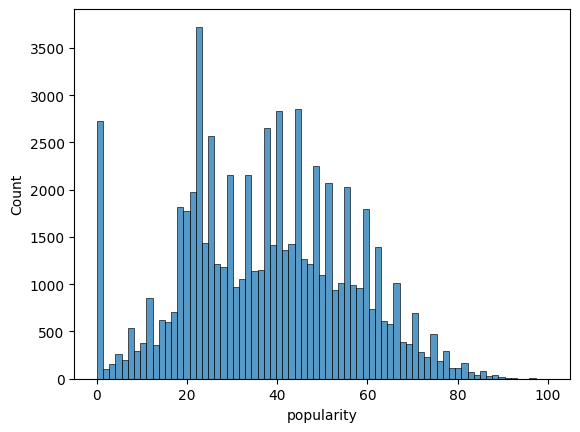

In [11]:
histogram_df = feature_df.copy()
# histogram = sns.histplot(histogram_df["popularity"])
# histogram.set(xlabel="Popularity", ylabel="Count")
boxplot = sns.histplot(histogram_df["popularity"])

boxplot
histogram_df["popularity"].describe()